In [42]:
import numpy as np
import pandas as pd

In [43]:
df=pd.read_excel('platdatset.xlsx')

In [44]:
df

,outlook,temp,humidity,windy,play
0,sun,h,high,f,no
1,sun,h,high,t,no
2,overcast,h,high,f,yes
3,rainy,mild,high,f,yes
4,rainy,cool,normal,f,yes
5,rainy,cool,normal,t,no
6,overcast,cool,normal,t,yes
7,sun,mild,high,f,no
8,sun,cool,normal,f,yes
9,rainy,mild,normal,f,yes


In [23]:
df1=df.iloc[:14,:]

In [24]:
df1

,outlook,temp,humidity,windy,play
0,sun,h,high,f,no
1,sun,h,high,t,no
2,overcast,h,high,f,yes
3,rainy,mild,high,f,yes
4,rainy,cool,normal,f,yes
5,rainy,cool,normal,t,no
6,overcast,cool,normal,t,yes
7,sun,mild,high,f,no
8,sun,cool,normal,f,yes
9,rainy,mild,normal,f,yes


In [45]:
df.outlook.value_counts(normalize=True)

sun         0.357143
rainy       0.357143
overcast    0.285714
Name: outlook, dtype: float64

In [46]:
df.outlook.value_counts()

sun         5
rainy       5
overcast    4
Name: outlook, dtype: int64

In [47]:
def entropy(x,y):
    vc=pd.Series(x).value_counts(normalize=True,sort=False)
    return -(vc*np.log(vc)/np.log(y)).sum(),vc

In [48]:
entropy(df.play,2)

(0.9402859586706309,
 no     0.357143
 yes    0.642857
 Name: play, dtype: float64)

In [49]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [50]:
x_encoded=pd.get_dummies(x,drop_first=True)

In [51]:
x_encoded

,outlook_rainy,outlook_sun,temp_h,temp_mild,humidity_normal,windy_t
0,0,1,1,0,0,0
1,0,1,1,0,0,1
2,0,0,1,0,0,0
3,1,0,0,1,0,0
4,1,0,0,0,1,0
5,1,0,0,0,1,1
6,0,0,0,0,1,1
7,0,1,0,1,0,0
8,0,1,0,0,1,0
9,1,0,0,1,1,0


In [30]:
x_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   outlook_rainy             23 non-null     uint8
 1   outlook_sun               23 non-null     uint8
 2   temp_h                    23 non-null     uint8
 3   temp_humidity             23 non-null     uint8
 4   temp_mild                 23 non-null     uint8
 5   temp_observations         23 non-null     uint8
 6   temp_outlook              23 non-null     uint8
 7   temp_temp                 23 non-null     uint8
 8   temp_windy                23 non-null     uint8
 9   humidity_high             23 non-null     uint8
 10  humidity_normal           23 non-null     uint8
 11  humidity_play value       23 non-null     uint8
 12  windy_0.78845             23 non-null     uint8
 13  windy_0.892159            23 non-null     uint8
 14  windy_0.91163             23 non-null     ui

In [52]:
y_encoded=pd.get_dummies(y,drop_first=True)

In [53]:
y_encoded

,yes
0,0
1,0
2,1
3,1
4,1
5,0
6,1
7,0
8,1
9,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.3, random_state=1)

In [54]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [55]:
model=DecisionTreeClassifier(criterion='entropy').fit(x_encoded,y_encoded)

[Text(0.5, 0.9, 'X[4] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.3, 0.7, 'X[1] <= 0.5\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(0.2, 0.5, 'X[0] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.1, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3, 0.3, 'X[5] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7, 0.7, 'X[5] <= 0.5\nentropy = 0.592\nsamples = 7\nvalue = [1, 6]'),
 Text(0.6, 0.5, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8, 0.5, 'X[0] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.7, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.9, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]')]

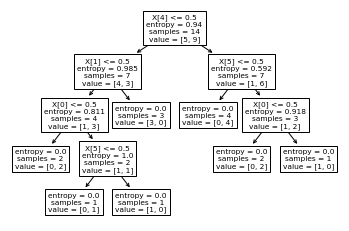

In [56]:
plot_tree(model)

In [59]:
model=DecisionTreeClassifier().fit(x_encoded,y_encoded)

[Text(0.5, 0.9, 'X[4] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.3, 0.7, 'X[1] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.2, 0.5, 'X[0] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3, 0.3, 'X[5] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7, 0.7, 'X[0] <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.6, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8, 0.5, 'X[5] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.7, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

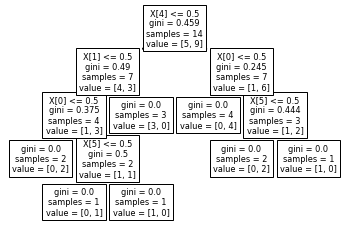

In [60]:
plot_tree(model)